# ***Student Name: Tushar Panchal***

# ***En. No. : 21162101014***

# ***Branch: CBA***

# ***Batch:  71***

# ***Subject: ML (Machine Learning)***

# **EXPERIMENT 1**
#  Exploratory data analysis in car price prediction dataset


#1. **Import dataset available at following url:**

# *https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data*

In [ ]:
import pandas as pd
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path)
print("The First 5 rows of the dataframe")
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(5)

The First 5 rows of the dataframe


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#2.   **Clean dataset.(hint: Replace missing values):**


In [ ]:
import pandas as pd
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header=None, na_values="?")
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].interpolate(method='linear',limit_direction='forward',axix=0)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  df[column].fillna(df[column].mode()[0], inplace=True)
print("\nNumber of missing values after Cleaning:")
print(df.isnull().sum())
print("\nThe first 10 rows of the cleaned dataframe:")
print(df.head(50))


Number of missing values after Cleaning:
symboling            0
normalized-losses    3
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

The first 10 rows of the cleaned dataframe:
    symboling  normalized-losses         make fuel-type aspiration  \
0           3                NaN  alfa-romero       gas        std   
1           3                NaN  alfa-romero       gas        std   
2           1                NaN  alfa-romero       gas        std   
3           2         

#3.     **Feature extraction using visualization (hint: matplotlib or seaborn graphs)Only regplots of continuous attributes**


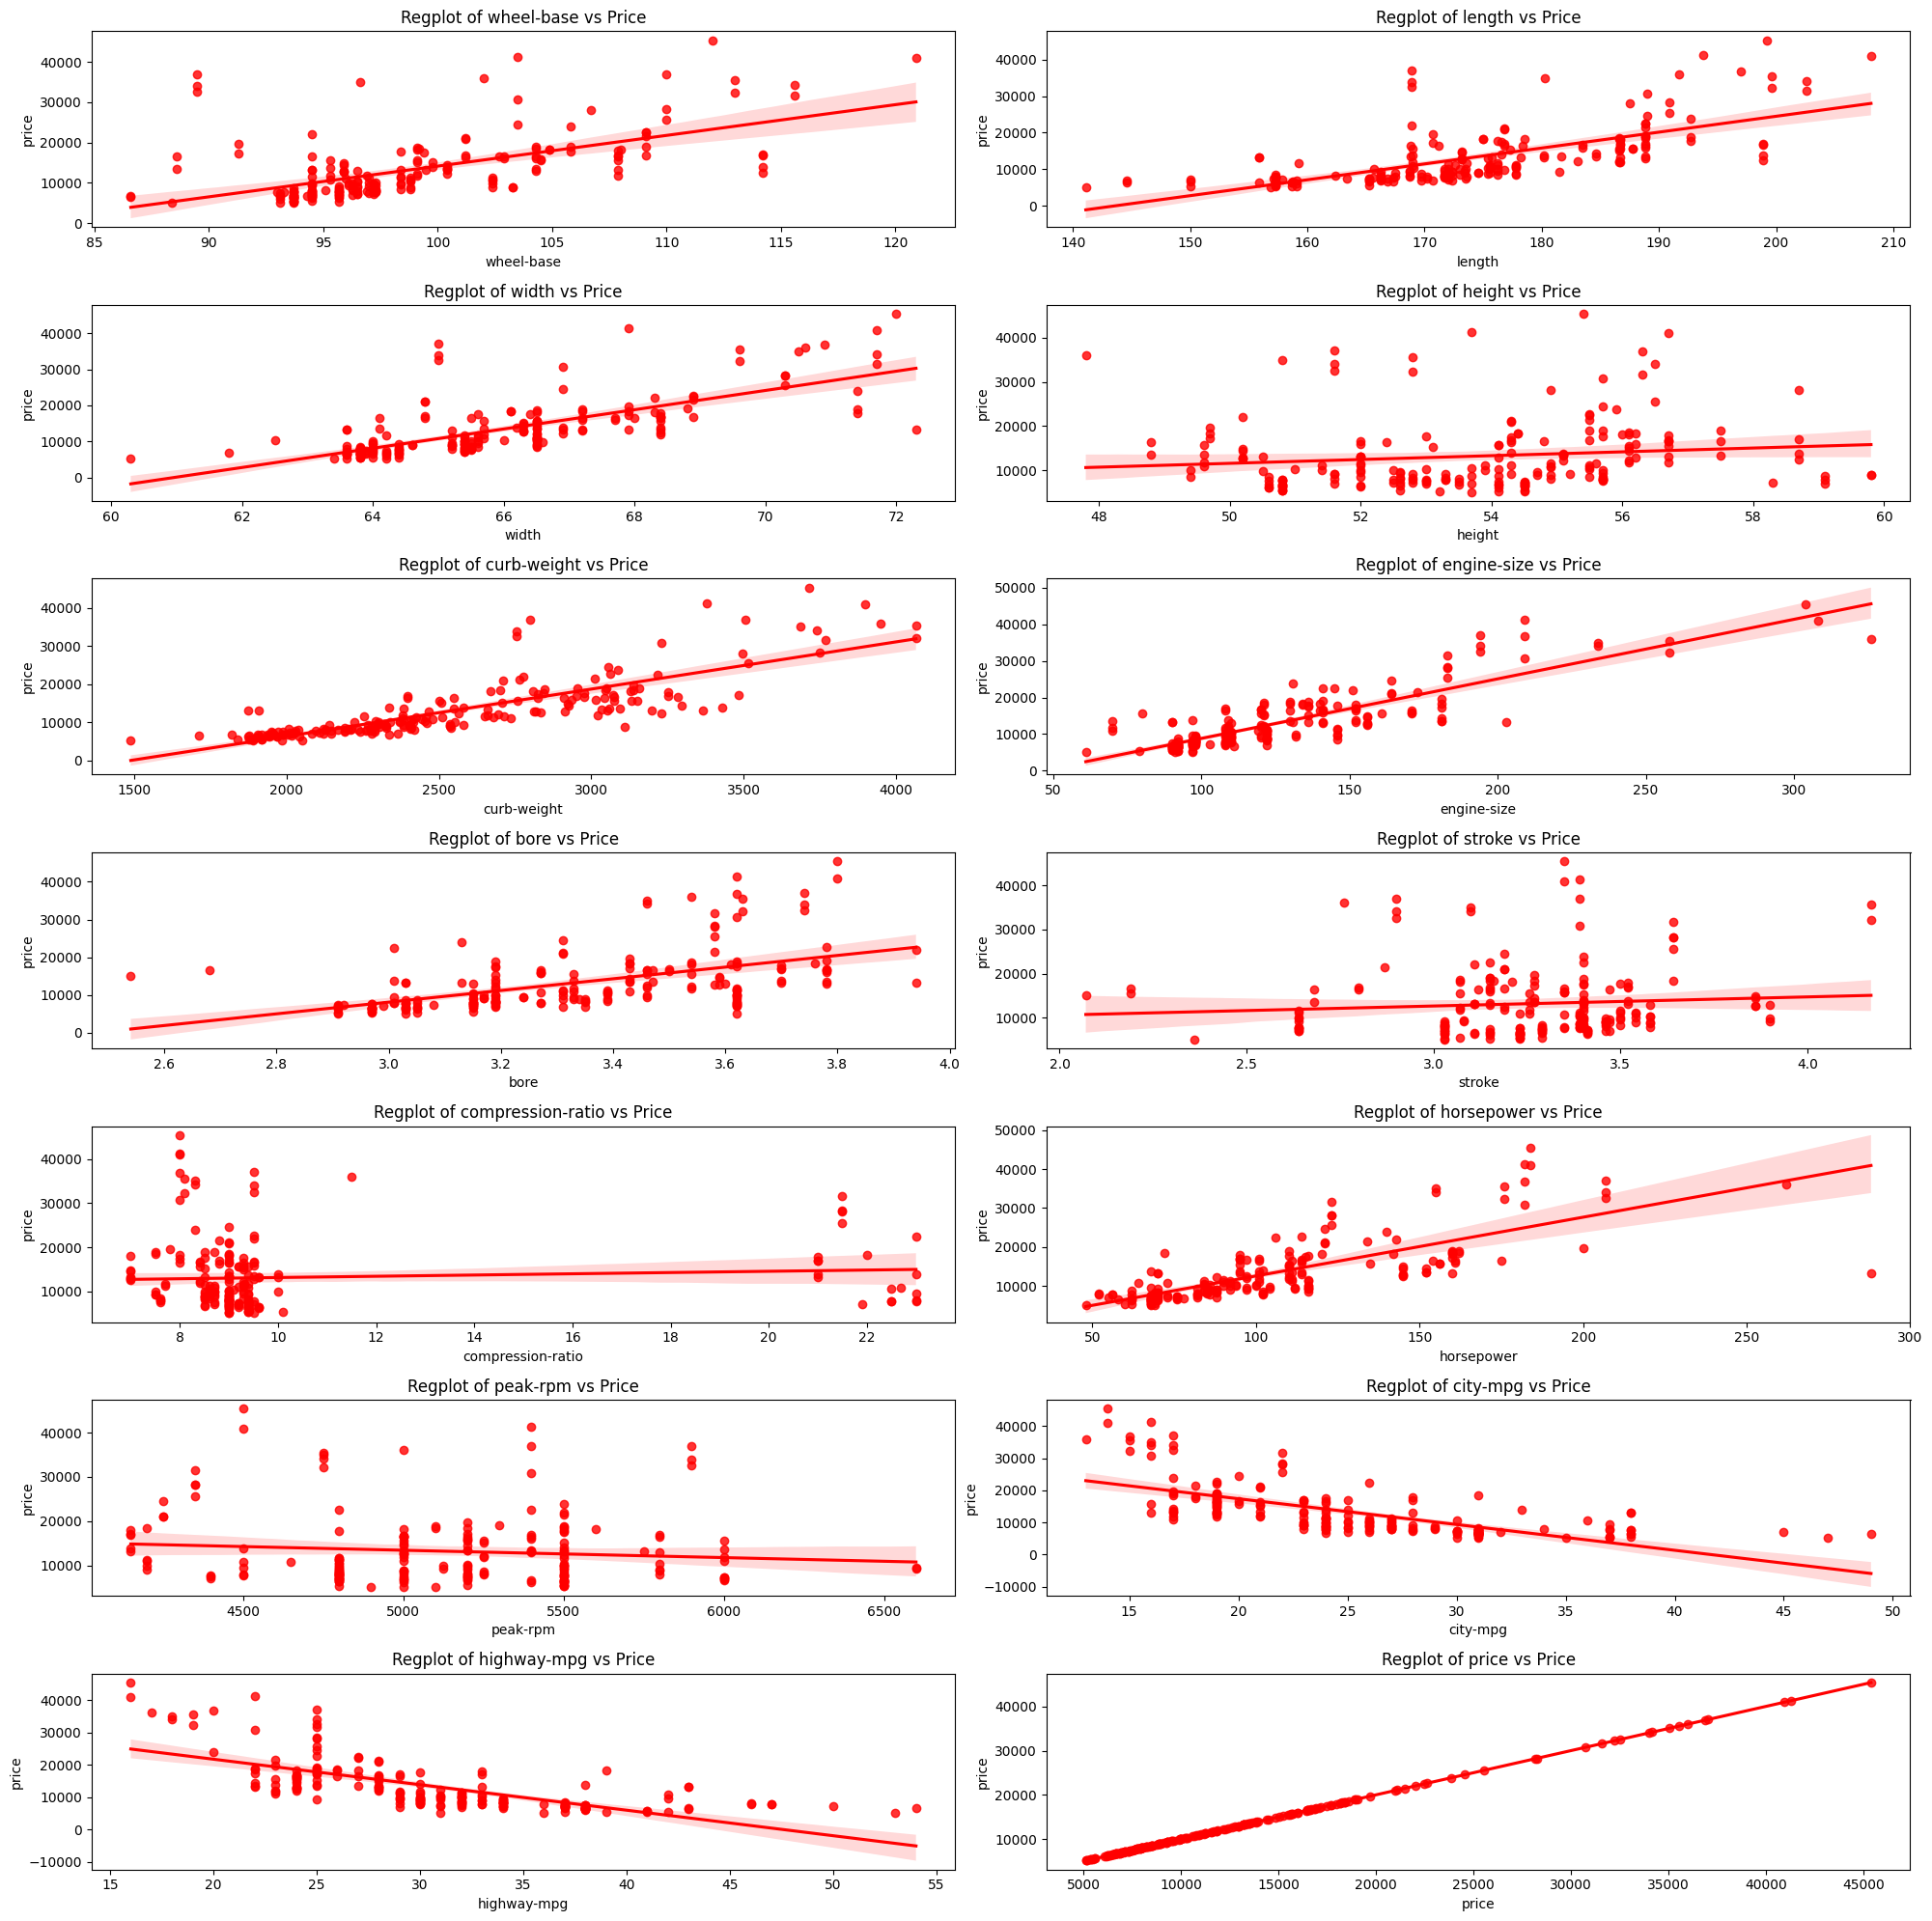

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header=None, na_values="?")

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

continuous_attributes = ["wheel-base", "length", "width", "height", "curb-weight", "engine-size",
                         "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

plt.figure(figsize=(20, 20))
for i, attribute in enumerate(continuous_attributes):
    plt.subplot(7, 2, i + 1)
    sns.regplot(x=attribute, y='price', data=df,color='#FF0000')
    plt.title(f'Regplot of {attribute} vs Price')

plt.tight_layout()
plt.show()
